In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import pandas as pd
import shoe
import blackjack
import player

In [35]:
#DEPRICATED
#cards DICTIONARY IS NOW STORED IN blackjack.py
#Dictionary of Blackjack Cards
cards = {'two':2,
        'three':3,
        'four':4,
        'five':5,
        'six':6,
        'seven':7,
        'eight':8,
        'nine':9,
        'ten':10,
        'jack':10,
        'queen':10,
        'king':10,
        'ace':[11,1]}

In [8]:
#DEPRICATED
#CreateDeck METHOD IS NOW IN blackjack.py
def CreateDeckOLD():
    #RETURNS: deck - list of str of cards making a standard 52 card deck
    deck = list(cards.keys())*4
#     random.shuffle(deck) #inplace shuffle
    
    return deck

In [21]:
print(f'2 deck cut boundaries: {10/(52*2)} to {15/(52*2)}')
print(f'6 deck cut boundaries: {52/(52*6)} to {78/(52*6)}')
print(f'Dealer always penetrates at a range of 1 to 1.5 decks from the back, or {52/(52*6)} to {78/(52*6)}')

2 deck cut boundaries: 0.09615384615384616 to 0.14423076923076922
6 deck cut boundaries: 0.16666666666666666 to 0.25
Dealer always penetrates at a range of 1 to 1.5 decks from the back, or 0.16666666666666666 to 0.25


In [18]:
#DEPRICATED
#UPDATED VERSION IN shoe.py

def CreateShoeOLD(deck,shoe_size = 6):
    '''
    PARAMETERS:
    shoe_size - int of number of decks in shoe

    RETURNS:
    tuple - list of [shoe_size * deck] cards minus random penetration
            and
            list of cards equal to penetration (reserve cards for dealing last hand)
    '''

    if shoe_size > 2:
        pen_range = [(52/(52*shoe_size)), ((52*1.5)/(52*shoe_size))]
    else:
        #single and double deck penetrate from 10 to 15 cards
        pen_range = [10/(52*shoe_size), 15/(52*shoe_size)]

    #ensures that each deck added to the shoe is shuffled
    #this might just be gamblers superstition on my part...
    shoe = []
    for _ in range(shoe_size):
        random.shuffle(deck)
        shoe += deck
        
    random.shuffle(shoe) #in-place shuffle
    
    #generates penetration at a random specific card based on pen_range
    penetration = round(len(shoe)*random.uniform(pen_range[0],pen_range[1]))
    #generates playbale shoe with cards equal to penetration taken out
    
    return shoe[:-penetration],shoe[-penetration:]

In [2]:
#DEPRICATED
#HandAction IS NOW A METHOD IN blackjack.py
def HandActionAutomated(shoe_obj,current_player,d_hand=None):
    '''
    Case statement of blackjack plays.
    1=Stand, 2=Hit, 3=Double Down, 4= Split, 5=Surrender
    
    PARAMETERS:
    shoe_obj = current shoe being drawn from
    current_player = Player object of current player containing hand(s) and bankroll
    dealer = dictionary of dealers hand (only needed for automated blackjack)
    '''
    
    maxsplit = False #bool to check if maximum splits are reached so this doesn't loop forever
    
    for hand in current_player.GetHands():        
        #flag to tell when to stop prompting for current hand
        acting = True
        while acting:
            
            #assumes you're splitting, every other option turns this off
            splitting = True
            while splitting:
                
                _input = GetInput(hand,d_hand,maxsplit)
                
                if _input == 1:
                    #stand
                    acting = False
                    splitting = False

                elif _input == 2:
                    #hit
                    current_player.AddCard(hand,shoe_obj.DrawCard())
                    acting = True
                    splitting = False

                elif _input == 3:
                    #double down
                    hand['bet'] *= 2
                    current_player.AddCard(hand,shoe_obj.DrawCard())
                    acting = False
                    splitting = False

                elif _input == 4:
                    #split
                    if len(hand['cards']) > 2 or blackjack.cards[hand['cards'][0]] != blackjack.cards[hand['cards'][1]]: #REMOVE blackjack. WHEN IN blackjack.py
                        print('FAILSAFE: TRYING TO SPLIT NON-PAIRS')
                        maxsplit = True
            
                    elif len(current_player.hands) == 4 and maxsplit == False: #check if maximum splits have been reached
#                         print('You can only split 3 times.')
                        maxsplit = True #flip maxsplit bool so this doesn't loop forever
                        
                    else:
                        #splits hand into two hands, but WON'T interate to the next one until splitting = False
                        current_player.AddHand([hand['cards'][0],shoe_obj.DrawCard()],hand['bet']) #adding the hand['bet'] effectively doubles the bet
                        hand['cards'] = [hand['cards'][1]] #since only ['cards'] and ['value'] gets edited in the original hand, ['bet'] is retained
                        current_player.AddCard(hand,shoe_obj.DrawCard())

                elif _input == 5:
                    #surrender
                    hand['bet'] = hand['bet']/2
                    hand['value'] = 22
#                     print('Surrender (hand value will be set to 22)')
                    acting = False
                    splitting = False

                else:
                    #invalid input
                    print('Please select a valid input.')
                    print(_input)
                    splitting = False

                if hand['value'] > 21:
                    acting = False
                    splitting = False
                elif hand['value'] == 21: #automatically stops if value is 21
                    acting = False
                    splitting = False


In [17]:
#DEPRICATED
#PlayBlackjack IS NOW A METHOD IN blackjack.py
def PlayBlackjack():
    '''
    Plays blackjack
    
    No parameters or returns. This is a self-contained method
    that plays blackjack with while loops for user input and dealer decisions.
    '''
    
    #verbose statement
    print('Creating shoe...')
    
    #####################################################################
    deck = blackjack.CreateDeck() #Remove blackjack. once copied into blackjack.py
    #####################################################################
    shoe_obj = shoe.Shoe()
    
    #creates player object with bankroll
    bankroll = 5000
    player_obj = player.Player(bankroll)
    dealer_obj = player.Player()
    
    playing = True
    while playing:
        #checks to see if shoe in the shoe class is empty
        #if empty, it will create a new shoe
        ### ONLY UNCOMMENT WHEN LOOP ISN'T INFINITE ###
        if len(shoe_obj._shoe) == 0:
            #verbose statement
            print('Creating new shoe...')
            shoe_obj.CreateShoe(deck)
        
        #verbose statement
        print('New hand start!')
        #removes all hands from previous rounds
        player_obj.ResetHands()
        dealer_obj.ResetHands()
        
        print('Initial draw...')
        
        player_obj.AddHand([shoe_obj.DrawCard(),shoe_obj.DrawCard()],5)
        dealer_obj.AddHand([shoe_obj.DrawCard(),shoe_obj.DrawCard()],5)
        
        p_hand = player_obj.GetHands()[0] #gets 0th hand because we only have 1 hand right now
        d_hand = dealer_obj.GetHands()[0]

        print(f"Players hand: {p_hand['cards']}\nPlayers hand value: {p_hand['value']}")
        print(f"Dealers hand: {[d_hand['cards'][0]]}\nDealers hand value: {d_hand['shown_value']}")    

        player_acting = True #for while loop below if block
        '''
        Below is a huge block of if statements that are checking
        for player and dealer blackjack cases.
        '''
        if p_hand['value'] == 21:
            print('Blackjack!')
            
            if d_hand['shown_value'] == 11:
                even_money = input('Take even money? (y/n)\n')
                if even_money == 'y':
                    print(f"Player wins {p_hand['bet']}!")
                    player_obj.bankroll += _hand['bet']
                    player_obj.ResetHands()
                    player_acting = False
                else:
                    print("We're playing!")
                    if d_hand['value'] == 21:
                        print("Dealer also has blackjack.\nPlayer pushes.")
                        player_obj.ResetHands()
                        player_acting = False
            else:
                print(f"Player wins {p_hand['bet']*1.5}!")
                player_obj.bankroll += (_hand['bet']*1.5)
                player_obj.ResetHands()
                player_acting = False
            
        if d_hand['shown_value'] == 11 and p_hand['value'] != 21:
            insurance = input('Insurance? (y/n) ')
            
            if d_hand['value'] == 21:
                print(f'Dealer has blackjack with {d_hand["cards"]}')
                
                if insurance == 'y':
                    print("Player has insurance. Bet is lost, but insurance covers it.")
                    #since insurance is effectively a push, nothing happens.
                    player_obj.ResetHands()
                else:
                    print("Player does not have insurance.")
                    player_obj.bankroll -= _hand['bet']
                    player_obj.ResetHands()
                    
                player_acting = False
                
            else:
                print('Dealer does not have blackjack!')
                player_acting = True
        '''
        End of blackjack-checking if statements.
        '''

        '''
        Player decisions
        '''
        if player_acting:
            HandAction(shoe_obj,player_obj)
        
        '''
        Dealer decisions
        '''
        #if player busted out all their hands, dealer doesn't play
        #this for loop checks for any unbusted player hands
        #if blackjack/insurance/dealer blackjack has occurred, player_obj.GetHands() returns an empty list
        dealer_acting = False
        for _hand in player_obj.GetHands():
            if player_acting and _hand['value'] < 22:
                dealer_acting = True
                ##############################
                #COUNT DEALERS DOWN CARD HERE
                ##############################
            
        while dealer_acting:
            print(f"Dealers hand: {d_hand['cards']}\nDealers hand value: {d_hand['value']}")
            
            d_hand = dealer_obj.GetHands()[0]
            if d_hand['value'] == 17 and 'ace' in d_hand['cards']:
                #hit soft 17
                print('Dealer hits soft 17')
                dealer_obj.AddCard(d_hand,shoe_obj.DrawCard())
                
            elif d_hand['value'] < 17:
                #hit
                print('Dealer Hits')
                dealer_obj.AddCard(d_hand,shoe_obj.DrawCard())
                
            else:
                #stand
                print(f"Dealers hand: {d_hand['cards']}\nDealers hand value: {d_hand['value']}")
                print('Dealer Stands')
                dealer_acting = False
        
            if d_hand['value'] > 21:
                print(f"Dealers hand: {d_hand['cards']}\nDealers hand value: {d_hand['value']}")
                print('Dealer bust!')
                dealer_acting = False
        
        '''
        Payout block
        '''
        #if blackjack/insurance/dealer blackjack has occurred, player_obj.GetHands() returns an empty list
        for _hand in player_obj.GetHands():
            if _hand['value'] < 22 and d_hand['value'] > 21:
                print(f"Player has {_hand['cards']} ({_hand['value']}).")
                print(f"Player wins ${_hand['bet']} from dealer bust!")
                player_obj.bankroll += _hand['bet']

            elif _hand['value'] < 22 and _hand['value'] > d_hand['value']:
                print(f"{_hand['cards']} ({_hand['value']}) wins!")
                print(f"Player wins ${_hand['bet']}!")
                player_obj.bankroll += _hand['bet']

            elif _hand['value'] == d_hand['value']:
                print(f"Player's {_hand['cards']} ({_hand['value']}) pushes with Dealer's {d_hand['cards']} ({d_hand['value']}).")
            
            else:
                print(f"Player loses ${_hand['bet']}")
                player_obj.bankroll -= _hand['bet']
            
        if player_obj.bankroll < 1:
            print('OUT OF MONEY')
            playing = False        
        elif input('Continue playing? (y/n)') == 'n':
            playing = False
    

In [2]:
blackjack.PlayBlackjack(5000,5)

Creating shoe...
Player created with bankroll of $5000
Shuffling 6 decks into shoe...
Cutting...
Burning first card...
Shoe is read to play!
New hand start!
Initial draw...
Players hand: ['two', 'queen']
Players hand value: 12
Dealers hand: ['jack']
Dealers hand value: 10


TypeError: 'module' object is not callable

In [3]:
#DEPRICATED
#HandAction IS NOW A METHOD IN blackjack.py
def GetInput(p_hand,d_hand,maxsplit):
    '''
    Gets the input int to feed into HandAction
    
    PARAMETERS:
    p_hand = dictionary; players hand
    d_hand = dictionary; dealers hand
    
    RETURNS:
    int corresponding to: 1=Stand, 2=Hit, 3=Double Down, 4= Split, 5=Surrender
    '''
    strategy = {}
    #1=Stand, 2=Hit, 3=Double Down, 4= Split, 5=Surrender
    #The None values are to buffer indexes so that the indexes match dealer hand values
    #i.e. 2-11 values are indexes 2-11 respectively
    #Dealers hand: None,None,2,3,4,5,6,7,8,9,10,A
    strategy_basic = {4:[None,None,2,2,2,2,2,2,2,2,2,2],#in case of of maxsplit
            5:[None,None,2,2,2,2,2,2,2,2,2,2],
            6:[None,None,2,2,2,2,2,2,2,2,2,2],
            7:[None,None,2,2,2,2,2,2,2,2,2,2],
            8:[None,None,2,2,2,2,2,2,2,2,2,2],
            9:[None,None,2,3,3,3,3,2,2,2,2,2],
            10:[None,None,3,3,3,3,3,3,3,3,2,2],
            11:[None,None,3,3,3,3,3,3,3,3,3,3],
            12:[None,None,2,2,1,1,1,2,2,2,2,2],
            13:[None,None,1,1,1,1,1,2,2,2,2,2],
            14:[None,None,1,1,1,1,1,2,2,2,2,2],
            15:[None,None,1,1,1,1,1,2,2,2,5,5],
            16:[None,None,1,1,1,1,1,2,2,5,5,5],
            17:[None,None,1,1,1,1,1,1,1,1,1,5],
            18:[None,None,1,1,1,1,1,1,1,1,1,5],
            19:[None,None,1,1,1,1,1,1,1,1,1,5],
            20:[None,None,1,1,1,1,1,1,1,1,1,5],
            21:[None,None,1,1,1,1,1,1,1,1,1,1]}

    strategy_ace = {12:[None,None,2,2,2,3,3,2,2,2,2,2],#in case of of maxsplit
                    13:[None,None,2,2,2,3,3,2,2,2,2,2],
                    14:[None,None,2,2,2,3,3,2,2,2,2,2],
                    15:[None,None,2,2,3,3,3,2,2,2,2,2],
                    16:[None,None,2,2,3,3,3,2,2,2,2,2],
                    17:[None,None,2,3,3,3,3,1,1,2,2,2],
                    18:[None,None,1,1,1,1,3,1,1,1,1,1],
                    19:[None,None,1,1,1,1,1,1,1,1,1,1],
                    20:[None,None,1,1,1,1,1,1,1,1,1,1],
                    21:[None,None,1,1,1,1,1,1,1,1,1,1]}

    strategy_pair = {'AA':[None,None,4,4,4,4,4,4,4,4,4,4], #pair of aces
                     20:[None,None,1,1,1,1,1,1,1,1,1,1],
                     18:[None,None,4,4,4,4,4,1,4,4,1,1],
                     16:[None,None,4,4,4,4,4,4,4,4,4,5],
                     14:[None,None,4,4,4,4,4,4,2,2,2,2],
                     12:[None,None,4,4,4,4,4,2,2,2,2,2],
                     10:[None,None,3,3,3,3,3,3,3,3,2,2],
                     8:[None,None,2,2,2,4,4,2,2,2,2,2],
                     6:[None,None,4,4,4,4,4,4,2,2,2,2],
                     4:[None,None,4,4,4,4,4,4,2,2,2,2]}
    
    strategy_key = p_hand['value']
    strategy_text = '' #uncomment for debugging
    if p_hand['cards'][0] == p_hand['cards'][1] and len(p_hand['cards']) == 2 and maxsplit == False:
        strategy = strategy_pair.copy()
        strategy_text = 'Pair Strat' #uncomment for debugging
        if 'ace' in p_hand['cards']:
            strategy_key = 'AA'
    elif blackjack.CheckAces(p_hand['cards']): #checks if aces can still be 11s. if not, it's treated as a non-ace hand
        strategy = strategy_ace.copy()
        strategy_text = 'Ace Strat' #uncomment for debugging
    else:
        strategy = strategy_basic.copy()
        strategy_text = 'Basic Strat' #uncomment for debugging
        
        #uncomment for debugging
#     try:
#         strategy[strategy_key][d_hand['shown_value']]
#     except:
#         print(f'Player: {p_hand}')
#         print(f'Dealer: {d_hand}')
#         print(f'Key: {strategy_key}')
#         print(f'Maxsplit: {maxsplit}')
#         print(strategy_text)
#         print(strategy)
    
    return strategy[strategy_key][d_hand['shown_value']]

In [36]:
#DEPRICATED
#HandAction IS NOW A METHOD IN blackjack.py
def AutomatedBlackjack(nhands,counting,bankroll,even_money=False,insurance=False,betsize=5):
    '''
    Plays automated blackjack
    
    PARAMETERS:
    nhands = int of number of hands to play and record
    counting = boolean to turn card counting on (True) or off (False)
    bankroll = float of players current dollar count
    betsize = int of the baseline bet a player will make every hand
    
    RETURNS:
    bank_history = a numpy array of the players bankroll every hand
    WL_history = a numpy array record of the win-loss for every hand (1=win, 0=loss)
    bj_history = a numpy array record of player blackjacks for every hand (1=blackjack, 0=not blackjack)
    '''

    deck = blackjack.CreateDeck()
    shoe_obj = shoe.Shoe()
    
    #creates player object with bankroll
    print(f'Player created with bankroll of ${bankroll}')
    player_obj = player.Player(bankroll)
    dealer_obj = player.Player()
    
    bank_history = np.array([player_obj.bankroll])
    WL_history = np.zeros(0)
    bj_history = np.zeros(0)

    print("Playing...")
    for i in range(nhands):

        
        #checks to see if shoe in the shoe class is empty
        #if empty, it will create a new shoe
        ### ONLY UNCOMMENT WHEN LOOP ISN'T INFINITE ###
        if len(shoe_obj._shoe) == 0:
            shoe_obj.CreateShoe(deck)
        
        #removes all hands from previous rounds
        player_obj.ResetHands()
        dealer_obj.ResetHands()
        
        player_obj.AddHand([shoe_obj.DrawCard(),shoe_obj.DrawCard()],betsize)
        dealer_obj.AddHand([shoe_obj.DrawCard(),shoe_obj.DrawCard()])
        
        p_hand = player_obj.GetHands()[0] #gets 0th hand because we only have 1 hand right now
        d_hand = dealer_obj.GetHands()[0]  

        player_acting = True #for while loop below if block
        '''
        Below is a huge block of if statements that are checking
        for player and dealer blackjack cases.
        '''
        if p_hand['value'] == 21:
            #records blackjack history
            bj_history = np.append(bj_history,1)
            
            #checks if dealer has blackjack from an ace up-card and player has blackjack
            if d_hand['shown_value'] == 11:
#                 even_money = input('Take even money? (y/n)\n')
                if even_money:
#                     print(f"Player wins {p_hand['bet']}!")
                    player_obj.bankroll += _hand['bet']
                    player_obj.ResetHands()
                    player_acting = False
                else:
#                     print("We're playing!")
                    if d_hand['value'] == 21:
#                         print(f"Dealer also has blackjack with {d_hand['cards']}.\nPlayer pushes.")
                        player_obj.ResetHands()
                        player_acting = False
                        
            #checks if dealer has blackjack from a 10 up-card and player has blackjack
            elif d_hand['value'] == 21:
#                 print(f"Dealer also has blackjack with {d_hand['cards']}.\nPlayer pushes.")
                player_obj.ResetHands()
                player_acting = False
            else:
#                 print(f"Player wins {p_hand['bet']*1.5}!")
                player_obj.bankroll += (p_hand['bet']*1.5)
                player_obj.ResetHands()
                player_acting = False
        else:
            #records blackjack history
            bj_history = np.append(bj_history,0)
        
        #checks if dealer has blackjack from a 10 up-card but player doesn't have blackjack
        if d_hand['shown_value'] == 10 and d_hand['value'] == 21:
#             print(f"Dealer has blackjack with {d_hand['cards']}.")
#             print(f"Player loses ${p_hand['bet']}.")
            player_obj.bankroll -= p_hand['bet']
            player_obj.ResetHands()
            player_acting = False
        
        #checks if dealer has blackjack from an ace up-card and offers player insurance if they don't have blackjack
        if d_hand['shown_value'] == 11 and p_hand['value'] != 21:
#             insurance = input('Insurance? (y/n) ')
    
            if d_hand['value'] == 21:
#                 print(f'Dealer has blackjack with {d_hand["cards"]}.')
                
                if insurance:
#                     print("Player has insurance. Bet is lost, but insurance covers it.")
                    #since insurance is effectively a push, nothing happens.
                    player_obj.ResetHands()
                else:
#                     print(f"Player loses")
                    player_obj.bankroll -= p_hand['bet']
                    player_obj.ResetHands()
                    
                player_acting = False
                
            else:
#                 print('Dealer does not have blackjack!')
                player_acting = True
        '''
        End of blackjack-checking if statements.
        '''

        '''
        Player decisions
        '''
        if player_acting:
            HandActionAutomated(shoe_obj,player_obj,d_hand)
        
        '''
        Dealer decisions
        '''
        #if player busted out all their hands, dealer doesn't play
        #this for loop checks for any unbusted player hands
        #if blackjack/insurance/dealer blackjack has occurred, player_obj.GetHands() returns an empty list
        dealer_acting = False
        for _hand in player_obj.GetHands():
            if player_acting and _hand['value'] < 22:
                dealer_acting = True
                ##############################
                #COUNT DEALERS DOWN CARD HERE
                ##############################
            
        while dealer_acting:
#             print(f"Dealers hand: {d_hand['cards']}\nDealers hand value: {d_hand['value']}")
            
            d_hand = dealer_obj.GetHands()[0]
            if d_hand['value'] == 17 and 'ace' in d_hand['cards']:
                #hit soft 17
                dealer_obj.AddCard(d_hand,shoe_obj.DrawCard())
                
            elif d_hand['value'] < 17:
                #hit
                dealer_obj.AddCard(d_hand,shoe_obj.DrawCard())
                
            else:
                #stand
                dealer_acting = False
        
            if d_hand['value'] > 21:
                #Dealer bust
                dealer_acting = False
        
        '''
        Payout block
        '''
        #if blackjack/insurance/dealer blackjack has occurred, player_obj.GetHands() returns an empty list
        for _hand in player_obj.GetHands():
            if _hand['value'] < 22 and d_hand['value'] > 21:
                player_obj.bankroll += _hand['bet']

            elif _hand['value'] < 22 and _hand['value'] > d_hand['value']:
                player_obj.bankroll += _hand['bet']

            elif _hand['value'] == d_hand['value']:
                #push
                pass
            else:
                player_obj.bankroll -= _hand['bet']
        
        #records bankroll changes
        bank_history = np.append(bank_history,player_obj.bankroll)
        #records wins/losses
        if bank_history[i] >= bank_history[i-1]:
            WL_history = np.append(WL_history,1)
        else:
            WL_history = np.append(WL_history,0)
            
        #considers you out of money if you can't split the maximum amount of times (4)
        if player_obj.bankroll < betsize*4:
            print(f'OUT OF MONEY AFTER {i} HANDS')
            break
            
    print("Finished!")
    return player_obj.bankroll,bank_history,WL_history,bj_history
    

In [2]:
#AutomatedBlackjack parameters: nhands,shoesize,bankroll,counting=False,even_money=False,betsize=5
final_bankroll,bank_history,WL_history,bj_history = blackjack.AutomatedBlackjack(nhands=5000,shoesize=2,counting=False,bankroll=10_000,even_money=True,betsize=15)

In [3]:
final_bankroll

9062.5

In [94]:
WL_history.mean()

0.5

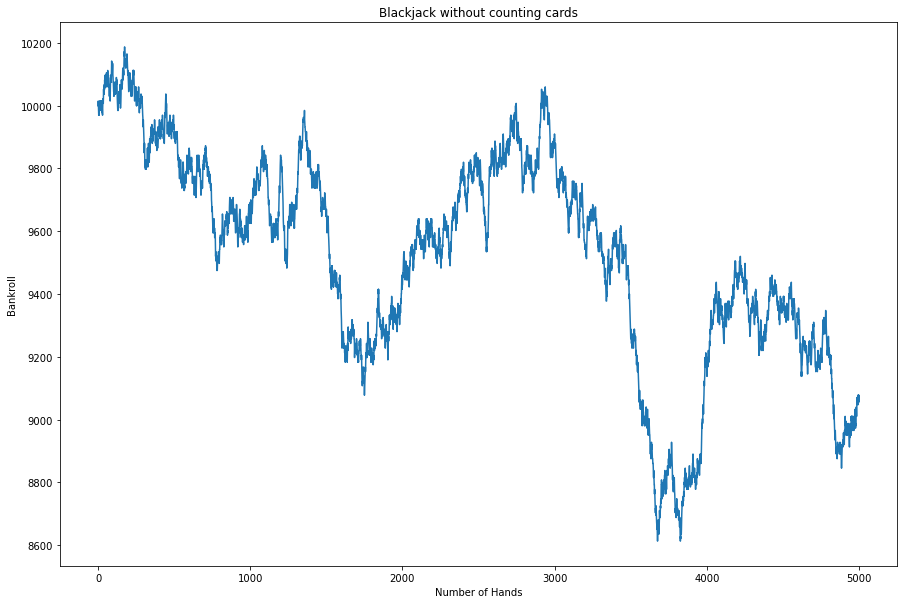

In [4]:
plt.figure(figsize = (15,10))

plt.ylabel('Bankroll')
plt.xlabel('Number of Hands')
plt.title('Blackjack without counting cards')
plt.plot(range(bank_history.shape[0]),bank_history)

In [17]:
#AutomatedBlackjack parameters: nhands,shoesize,bankroll,counting=False,even_money=False,betsize=5
final_bankroll,bank_history,WL_history,bj_history = blackjack.AutomatedBlackjack(nhands=2500,shoesize=2,counting=True,bankroll=1_000_000,betsize=1250)

In [19]:
final_bankroll

1109625.0

In [12]:
WL_history.mean()

0.492

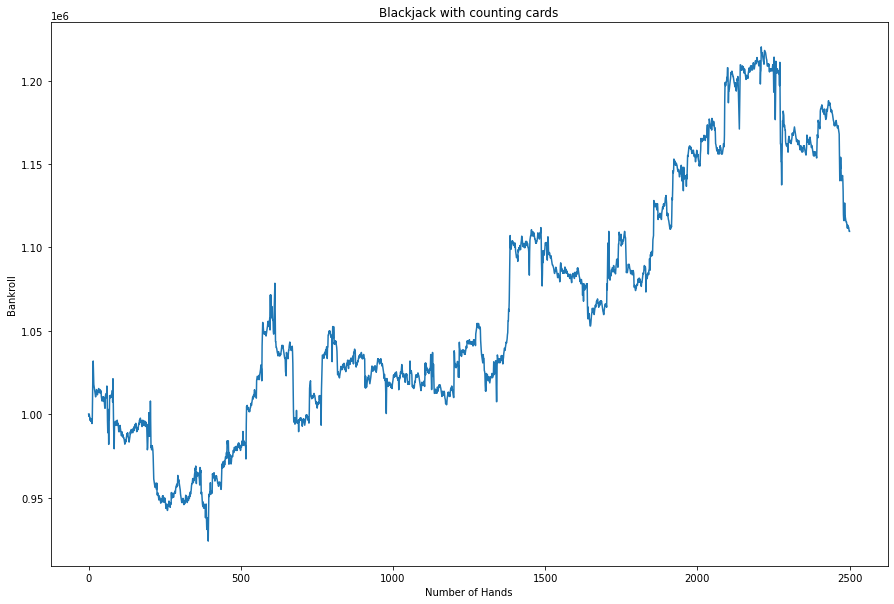

In [18]:
plt.figure(figsize = (15,10))

plt.ylabel('Bankroll')
plt.xlabel('Number of Hands')
plt.title('Blackjack with counting cards')
plt.plot(range(bank_history.shape[0]),bank_history)

In [6]:
final_bankroll,bank_history,WL_history,bj_history = None,None,None,None
bankroll = 10000
history_count = [0,0]
for _ in range(500):
    final_bankroll,bank_history,WL_history,bj_history = blackjack.AutomatedBlackjack(nhands=1000,shoesize=2,counting=False,bankroll=bankroll,even_money=True,betsize=15)
    if final_bankroll>=bankroll:
        history_count[0] += 1
    else:
        history_count[1] += 1
        
history_count

[217, 283]

In [7]:
final_bankroll,bank_history,WL_history,bj_history = None,None,None,None
bankroll = 10000
history_count = [0,0]
for _ in range(500):
    final_bankroll,bank_history,WL_history,bj_history = blackjack.AutomatedBlackjack(nhands=1000,shoesize=2,counting=True,bankroll=bankroll,betsize=15)
    if final_bankroll>=bankroll:
        history_count[0] += 1
    else:
        history_count[1] += 1

history_count

[301, 199]